# Regresión lineal multivariable
En esta notebook aprenderemos qué es una regresión lineal y cómo funciona con un ejemplo en Python. Para esto lo primero que tendremos que hacer es descargar los datos y entender qué contienen.

## Importando datos

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv("./../data/raw/housing.data", header = None, sep = "\s+" )

In [5]:
df.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]





In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Entendiendo los datos
Una vez descargados los datos lo que hay que hacer es entenderlos. Es importante saber que el algoritmo de regresión lineal se basa altamente en correlaciones por lo que yo recomiendo que empecemos viendo un gráfico de correlaciones usando pairplot de Seaborn.

 Descripción de las columnas a analisar en el conjunto de datos de viviendas de Boston:

1. "CRIM": Esta columna representa la tasa de criminalidad per cápita por ciudad. Mide la tasa de criminalidad en la ciudad donde se encuentra la vivienda.

2. "INDUS": Esta columna se refiere a la proporción de acres de negocios no minoristas por ciudad. Indica la proporción de terreno industrial en la ciudad.

3. "RM": Esta columna representa el número promedio de habitaciones por vivienda. Mide el tamaño promedio de las viviendas en la ciudad.

4. "DIS": Esta columna indica la distancia ponderada a los centros de empleo en Boston. Mide la accesibilidad a lugares de trabajo en la ciudad.

5. "MEDV": Esta columna representa el valor medio de las viviendas ocupadas por sus propietarios en miles de dólares. Es una de las variables objetivo en el conjunto de datos y se utiliza a menudo como el valor objetivo a predecir en modelos de regresión.

Estas son algunas de las características clave del conjunto de datos de viviendas de Boston. Cada una de estas columnas proporciona información importante sobre las viviendas y su entorno en diferentes áreas de Boston.

Una vez que se ve cómo están correlacionadas las variables de manera visual es importante usar un método numérico para poder entender las correlaciones. 

## Creando modelo de dos variables independientes con scikit-learn

In [7]:
# Definimos las variables predictoras (X) y la variable objetivo (y)
X = df[["RM", "INDUS"]].values # X contiene las características "RM" y "INDUS"
y = df["MEDV"].values.reshape(-1, 1) # y contiene la variable objetivo "MEDV"
# Nota: reshape(-1, 1) asegura que y tenga una sola columna y el número adecuado de filas.

# Realizamos el escalado de las variables (X, y) para estandarizarlas
sc_x = StandardScaler() # Inicializamos el escalador para las características (X)
sc_y = StandardScaler() # Inicializamos el escalador para la variable objetivo (y)

X_std = sc_x.fit_transform(X) # Aplicamos el escalado estándar a las características (X)
y_std = sc_y.fit_transform(y) # Aplicamos el escalado estándar a la variable objetivo (y)


In [8]:
# Declaramos y ajustamos el modelo de Regresión Lineal
slr = LinearRegression()
slr.fit(X_std, y_std)

LinearRegression()

## Análisis de resultados

In [9]:
from mpl_toolkits.mplot3d import *


/home/jose94pablo/anaconda3/envs/regresion_lineal/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


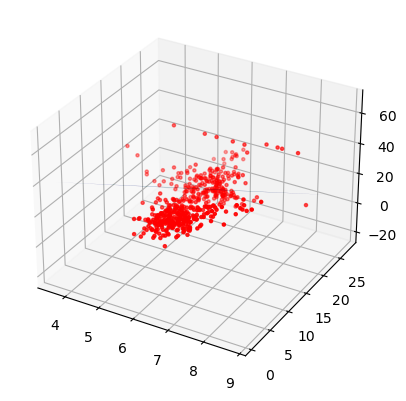

In [10]:
# Generamos rangos de valores para las características "RM" y "INDUS"
x1_range = np.arange(df["RM"].min(), df["RM"].max()) # Rango de valores para "RM"
x2_range = np.arange(df["INDUS"].min(), df["INDUS"].max()) # Rango de valores para "INDUS"

# Creamos una malla de valores para las características "RM" y "INDUS"
X1, X2 = np.meshgrid(x1_range, x2_range)

# Creamos un DataFrame llamado "plano" con las combinaciones de valores de "RM" y "INDUS" en la malla
plano = pd.DataFrame({"RM": X1.ravel(), "INDUS":X2.ravel()})
# Nota: .ravel() convierte el arreglo de NumPy en una dimensión.

# Realizamos predicciones usando el modelo de regresión lineal en el plano
pred = slr.predict(plano).reshape(X1.shape)
# Nota: Reshape devuelve la forma original (en este caso, la forma de la malla X1).

# Invertimos la transformación estandarizada en las predicciones
pred = sc_y.inverse_transform(pred)

# Creamos una figura en 3D
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")

# Dibujamos la superficie de predicciones en el plano
ax.plot_surface(X1, X2, pred, alpha = 0.4)

# Dibujamos puntos en 3D de las muestras originales (usando "RM", "INDUS" y "MEDV")
ax.scatter3D(df["RM"], df["INDUS"], df["MEDV"], color = "r", marker = ".")

# Mostramos la figura
plt.show()


/home/jose94pablo/anaconda3/envs/regresion_lineal/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


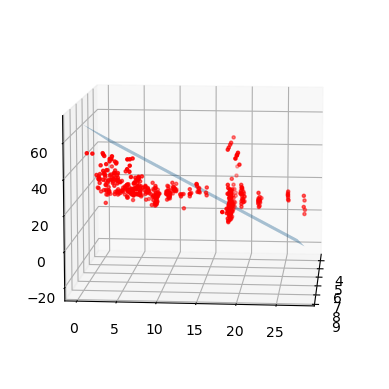

In [11]:
# Se agrega ax.view_init(elev = 10, azim = 5) para cambiar el punto de la cámara y la perspectiva.
x1_range = np.arange(df["RM"].min(), df["RM"].max())
x2_range = np.arange(df["INDUS"].min(), df["INDUS"].max())

X1, X2 = np.meshgrid(x1_range, x2_range)

plano = pd.DataFrame({"RM": X1.ravel(), "INDUS": X2.ravel()}) # .ravel colapsa el arreglo de numpy en una dimensión.
pred = slr.predict(plano).reshape(X1.shape)
pred = sc_y.inverse_transform(pred)

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(X1, X2, pred, alpha=0.4)

ax.scatter3D(df["RM"], df["INDUS"], df["MEDV"], color="r", marker=".")
ax.view_init(elev=10, azim=5) # Cambia el punto de vista de la cámara.
plt.show()
